# Business Understanding

In a previous week, I read [this WIRED post](https://www.wired.com/story/kickstarter-turns-10/) about Kickstarter, and this is the beginning of why I write this post.

In this notebook, I’ll take a look at [this Kickstarter dataset](https://www.kaggle.com/kemical/kickstarter-projects) and investigate how to make your project successful.

---

[Kickstarter](https://www.kickstarter.com) is the world’s largest funding platform for creative projects. It is known to be one of the most popular crowdfunding services in the world. According to its official website, 16 million people have backed a project, $4.2 billion has been pledged, and 161,886 projects have been funded ten years since its launch from 2009.

The word, crowdfunding, became common in modern society. Before this kind of services or systems, we need to save money or ask money for a bank. But we now have these new platforms as one of the ways to collect money for your creative projects.

---

Throughout the analysis, the below three questions will be considered:

1. Is the number of projects increasing?
1. What factors may be associated with the success/failure of the projects?
1. How to make your technology project successful? (Because I’m a tech person)

In this notebook I'll follow [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process which is one of the standrad methods for data analysis.

CRISP-DM has the below five steps:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

However, the last three steps are not necessary since the purpose of my analysis is to answer three questions, not to predict something or deploy a web application. Instead of those steps, I'll use visualisation and statistical values.

So the process I'll follow in this notebook is the following:

* Business Understanding
* Data Understanding
* Data Preparation
* Visualisation/Statistics to answer three questions

# Data Understanding

Import libraries

In [437]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

* dataset: `input/ks-projects-201801.csv`

In [405]:
df = pd.read_csv('./input/ks-projects-201801.csv')

Let's take a look at first five rows of the dataset.

In [406]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [413]:
print("columns: {}".format(df.shape[1]))
print("rows: {}".format(df.shape[0]))

columns: 15
rows: 378661


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


__Column description__ as described [here](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv)

* ID: internal kickstarter id
* name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
* category: category
* main_category: category of campaign
* currency: currency used to support
* deadline: deadline for crowdfunding
* goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
* launched: date launched
* pledged: amount pledged by "crowd"
* state: Current condition the project is in
* backers: number of backers
* country: country pledged from
* usd_ pledged: pPledged amount in USD (conversion made by KS)
* usd_pledged_real: pledged amount in USD (conversion made by fixer.io api)
* usd_goal_real: goal amount in USD

Use `pandas-summary` to get the stats of the data (also automatically detects the types of the columns)

In [398]:
summary = DataFrameSummary(df)

In [399]:
summary.summary()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661,NaN,NaN,NaN,NaN,NaN,378661,NaN,378661,NaN,378661,NaN,374864,378661,378661
mean,1.07473e+09,NaN,NaN,NaN,NaN,NaN,49080.8,NaN,9682.98,NaN,105.617,NaN,7036.73,9058.92,45454.4
std,6.19086e+08,NaN,NaN,NaN,NaN,NaN,1.18339e+06,NaN,95636,NaN,907.185,NaN,78639.7,90973.3,1.15295e+06
min,5971,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0,NaN,0,NaN,0,0,0.01
25%,5.38264e+08,NaN,NaN,NaN,NaN,NaN,2000,NaN,30,NaN,2,NaN,16.98,31,2000
50%,1.07528e+09,NaN,NaN,NaN,NaN,NaN,5200,NaN,620,NaN,12,NaN,394.72,624.33,5500
75%,1.61015e+09,NaN,NaN,NaN,NaN,NaN,16000,NaN,4076,NaN,56,NaN,3034.09,4050,15500
max,2.14748e+09,NaN,NaN,NaN,NaN,NaN,1e+08,NaN,2.0339e+07,NaN,219382,NaN,2.0339e+07,2.0339e+07,1.66361e+08
counts,378661,378657,378661,378661,378661,378661,378661,378661,378661,378661,378661,378661,374864,378661,378661
uniques,378661,375764,159,15,14,3164,8353,378089,62130,6,3963,23,95455,106065,50339


Good news is taht there are only few missing values in the dataset.  
Only the below two columns have missing values:

* name: 4
  * Only four missing values might not matter for my analysis. Also, `name` does not seem to be meaningful to understand what kind of projects have been succeeded or failed.
* usd pledged: 3,797(1.00% )
  * The dataset has `pledged` column so I might not need `usd pledged` column. I decided to do nothing with column.

In [429]:
df[df.name.isna()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
2012-01-01 12:35:31,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00,2012
2012-12-19 23:57:48,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97,2012
2016-06-18 05:01:47,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00,2016
2011-11-06 23:55:55,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00,2011


The number of the projects (ID count)

(The dataset has 378661 rows, so the IDs are not duplicated)

In [412]:
df.ID.nunique()

378661

Now, let's see the distributions of the some columns to hopefully get some insight of the dataset.

Category distributions

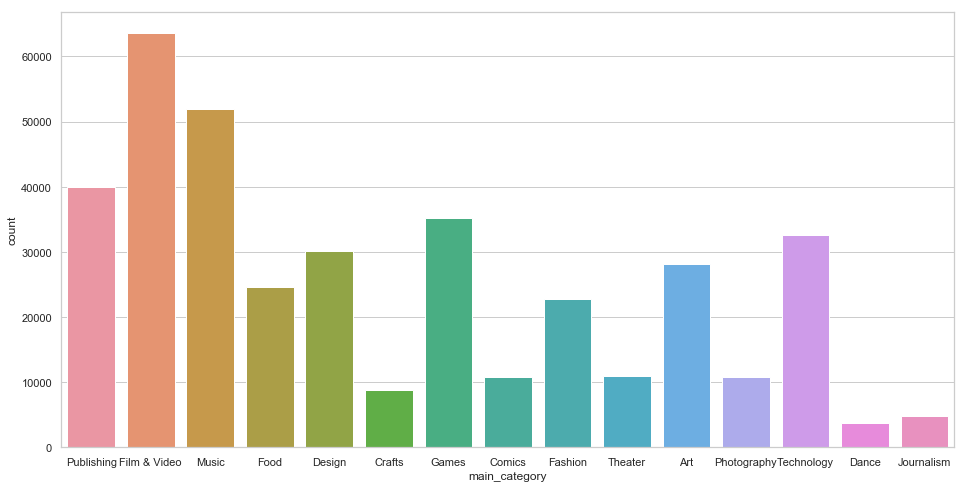

In [430]:
plt.figure(figsize=(16, 8))
sns.countplot(df['main_category']);

Goal distribtuions (skewed)

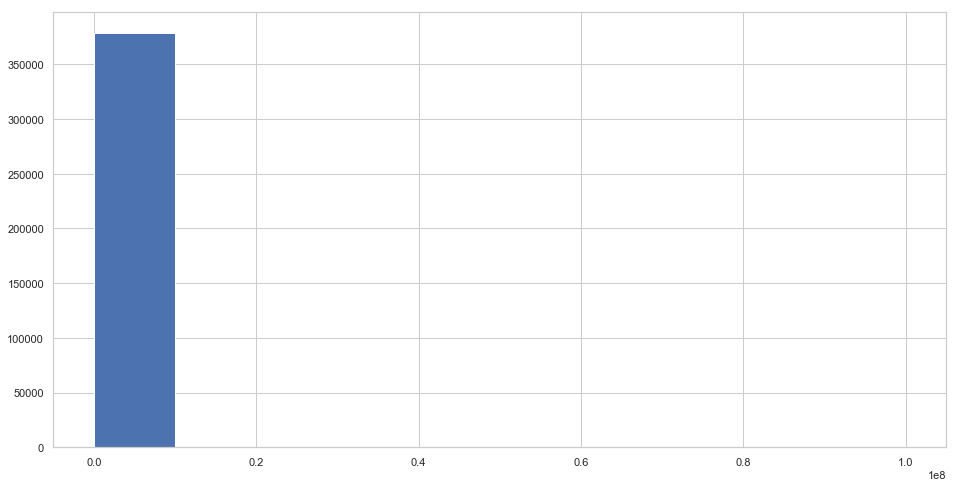

In [431]:
plt.figure(figsize=(16, 8))
df['goal'].hist();

Country distributions

In [432]:
country_counts = df.country.value_counts()
country = pd.DataFrame()
country['country'] = country_counts.index.values
country['count'] = country_counts.values

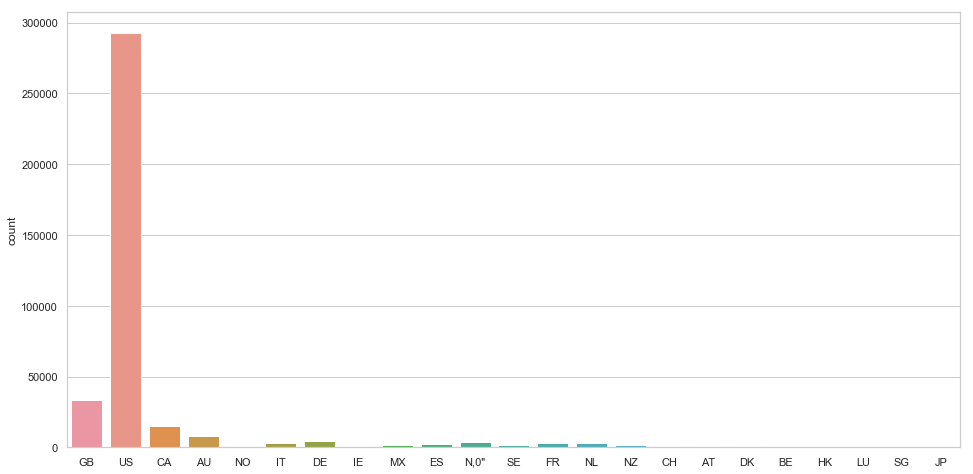

In [433]:
plt.figure(figsize=(16, 8))
g = sns.countplot(df['country'].values)

Top 5 countries

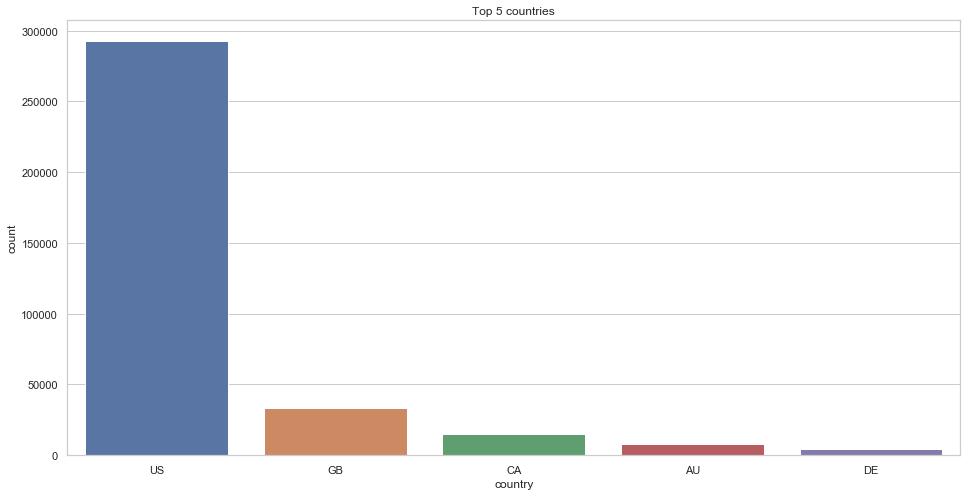

In [435]:
plt.figure(figsize=(16, 8))
sns.barplot(x="country", y="count", data=country.head())
plt.title("Top 5 countries");

# Data Preparation

There are seven rows with the launched date is `1970-01-01 01:00:00` which seems to be strange.

In [421]:
df.sort_values(by='launched').head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00
169268,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:48,625.0,failed,30,US,625.0,625.0,1000.00
322000,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:53,22.0,failed,3,US,22.0,22.0,80000.00
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,35.0,35.0,20.00


`1970-01-01 01:00:00` might be a default value for the column `launched`.
Since there are only seven rows with it, I'll drop the data with launched at `1970-01-01 01:00:00`.

In [422]:
df = df[df['launched'] != '1970-01-01 01:00:00']

`deadline` and `launched` are the date columns, so I'll convert them to datetime.
Also, I create `launched_year` column to be used later visualisation.

In [423]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['launched_year'] = df.launched.dt.year.values
df.index = df.launched.values

In [424]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378654 entries, 2015-08-11 12:12:28 to 2011-07-19 09:07:47
Data columns (total 16 columns):
ID                  378654 non-null int64
name                378650 non-null object
category            378654 non-null object
main_category       378654 non-null object
currency            378654 non-null object
deadline            378654 non-null datetime64[ns]
goal                378654 non-null float64
launched            378654 non-null datetime64[ns]
pledged             378654 non-null float64
state               378654 non-null object
backers             378654 non-null int64
country             378654 non-null object
usd pledged         374857 non-null float64
usd_pledged_real    378654 non-null float64
usd_goal_real       378654 non-null float64
launched_year       378654 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(6)
memory usage: 49.1+ MB


# Questions

Let's get started to answer the below three questions.

1. Is the number of projects increasing?
1. What factors may be associated with the success/failure of the projects?
1. How to make your technology project successful?

# 1. Is the the number of projects increasing?

Since the foundation of Kickstarter in 2019, the number of projects has been increased year by year. The first two years had around 10,000 projects and after five years of the foundation in 2015, the number reached the peak as almost 80,000.

This indicates the phenomena of crowdfunding became popular and also implies the success of Kickstarter itself.

However, after the peak in 2015, the number of projects started decreasing. I come up with several possible things can be considered as the cause of the fact such as economic crisis, the emergence of competitors so on.

In [442]:
_projects_per_year = df.groupby('launched_year')['ID'].count()
projects_per_year = pd.DataFrame()
projects_per_year['year'] = _projects_per_year.index.values
projects_per_year['counts'] = _projects_per_year.values

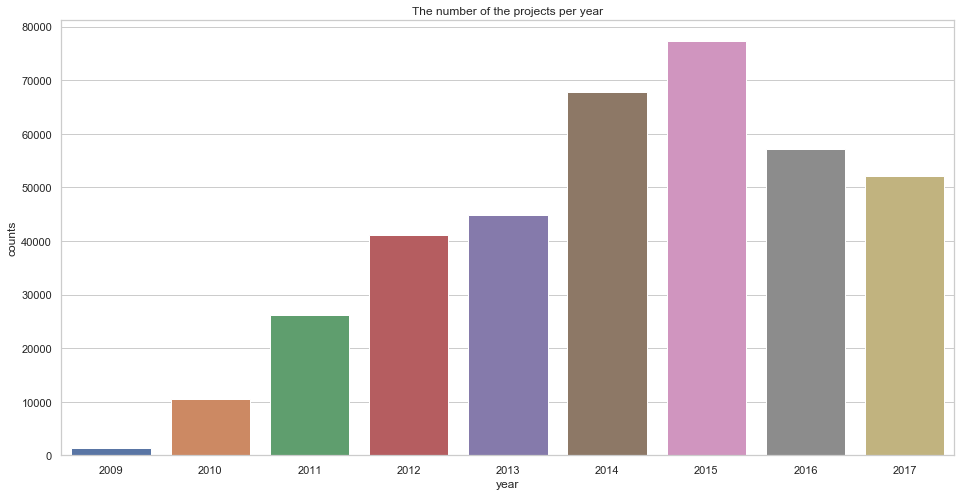

In [443]:
plt.figure(figsize=(16, 8))
# The dataset is until 201801, so I'll exclude the projects in 2018.
g = sns.barplot(x='year', y='counts', data=projects_per_year[projects_per_year['year'] != 2018])
plt.title("The number of the projects per year");

The number of projects seems to be decreasing as the above figure. But it is not really a bad thing if we see the pledge of projects per year as below.

In [444]:
_fund_per_year = df.groupby('launched_year')['pledged'].sum()
fund_per_year = pd.DataFrame()
fund_per_year['year'] = _fund_per_year.index.values
fund_per_year['fund'] = _fund_per_year.values

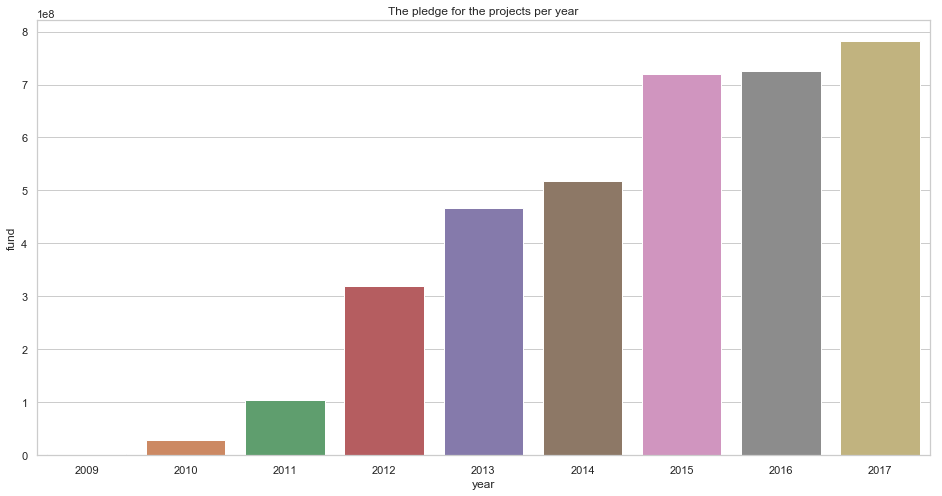

In [445]:
plt.figure(figsize=(16, 8))
# The dataset is until 201801, so I'll exclude the projects in 2018.
g = sns.barplot(x='year', y='fund', data=fund_per_year[fund_per_year['year'] != 2018])
plt.title("The pledge for the projects per year");

While the number of projects has been decreasing after 2015, the total amount of pledge keeps increasing. Good news is that it can mean some projects can get funded more than before.

# 2. What factors may be correlated with the success/failure of the projects?

If you are supposed to propose a Kickstarter project, you surely want to make your project successful. The below pie chart shows that only 35% of the projects were succeeded and the rest of the projects were either failed, cancelled or suspended. “35%” is not really a disappointing number compared to the averages in MLB.

In [446]:
state_counts = df.state.value_counts()
state = pd.DataFrame()
state['state'] = state_counts.index.values
state['count'] = state_counts.values

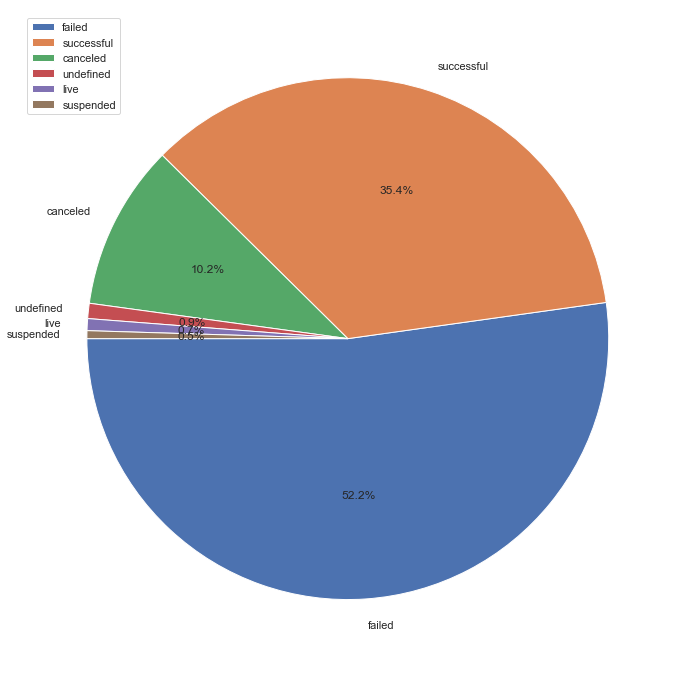

In [447]:
plt.figure(figsize=(12, 12))
plt.pie(state['count'].values, labels=state.state.values, autopct='%1.1f%%', startangle=180)
plt.legend();

The average success rate is only 35%, but the Top 5 categories show better success ratios than the average.

In [350]:
categories = df.main_category.unique()
categories.sort()

In [352]:
# empty lists
successes = []
totals = []

for category in categories:
    successed_count = category_state.loc[category, 'successful'].values.sum()
    total_count = category_state.loc[category].ID.values.sum()
    successes.append(successed_count)
    totals.append(total_count)
    
# dataframe
category_state_ratio = pd.DataFrame()
category_state_ratio['category'] = categories
category_state_ratio['successed'] = successes
category_state_ratio['total'] = totals
category_state_ratio['succeeded (%)'] = category_state_ratio['successed'] / category_state_ratio['total'] * 100

In [353]:
category_state_ratio = category_state_ratio.sort_values(by='succeeded (%)', ascending=False).reset_index(drop=True)
category_state_ratio

,category,successed,total,succeeded (%)
0,Dance,2338,3768,62.048832
1,Theater,6534,10912,59.879032
2,Comics,5842,10819,53.997597
3,Music,24197,51917,46.607084
4,Art,11510,28152,40.885195
5,Film & Video,23623,63583,37.153013
6,Games,12518,35231,35.531208
7,Design,10550,30069,35.085969
8,Publishing,12300,39873,30.847942
9,Photography,3305,10779,30.661471


Top 3

* Comics: 54.0%
* Dance: 62.0%
* Theater: 59.9%

Bottom 3

* Crafts: 24.0%
* Journalism: 21.3%
* Technology: 19.8%

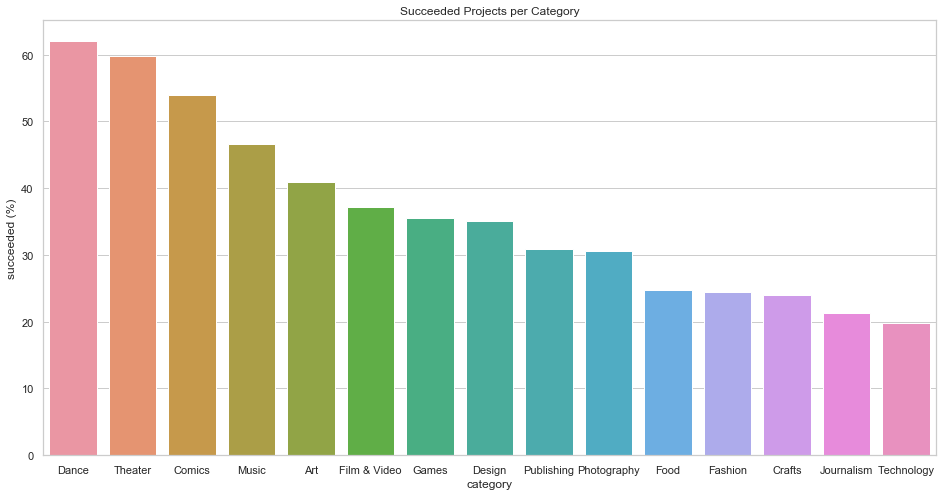

In [354]:
plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='succeeded (%)', data=category_state_ratio)
plt.title("Succeeded Projects per Category");

__Top 5__

* Dance
* Theatre
* Comics
* Music
* Art

__Bottom 5__ 

* Technology
* Journalism
* Crafts
* Fashion
* Food

The categories of the projects seem to really matter here because the success ratio of the Dance and Theatre is almost 60%. The worst category is Technology (20%) and they are three times different.

One possible reason is that the bottom five categories have higher uncertainty than that of the top five categories. For example, if you want to try new technology in your project, there might be much trial-and-error in the process compared to dancing by yourself.

Also, it will be difficult for backers to imagine what projects are going to do if it comes to technology, journalism so on.

# 3. How to make your technology project successful?

As shown in the previous figures, the Technology category is the worst regarding the success ratio.

But in this category, what kind of projects were especially failed or succeeded? Here we might get some clues to make our projects successful.

What sub categories were succssful in Technology?

In Technology categort, the below sub categories were somehow successful:

* Hardware
* Gadgets

In [360]:
df[(df['main_category'] == 'Technology') & (df['state'] == 'successful')].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
2014-05-28 13:54:18,1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.0,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,2014
2012-11-29 13:54:50,1000776914,"VLC for the new Windows 8 User Experience (""Me...",Software,Technology,GBP,2012-12-29,40000.0,2012-11-29 13:54:50,47056.86,successful,3080,GB,75365.14,75379.02,64074.84,2012
2016-11-19 04:05:23,100078996,APP - CUSTOM SHOES/ Calzado Personalizado - MA...,Apps,Technology,MXN,2016-12-21,55000.0,2016-11-19 04:05:23,56680.00,successful,24,MX,2.45,2739.22,2658.03,2016
2012-06-11 13:55:42,1001077166,Student Operated Fabrication Lab,Fabrication Tools,Technology,USD,2012-07-11,5000.0,2012-06-11 13:55:42,5000.00,successful,57,US,5000.00,5000.00,5000.00,2012
2015-05-13 13:20:01,100114978,Inclusive Toolkit: tools for iOS & OS X app ac...,Software,Technology,GBP,2015-06-13,5500.0,2015-05-13 13:20:01,7157.00,successful,184,GB,11147.99,11335.49,8711.08,2015


In [449]:
succeeded_techs = df[(df['main_category'] == 'Technology') & (df['state'] == 'successful')]['category'].value_counts().to_frame()
succeeded_techs['counts'] = succeeded_techs['category']
succeeded_techs['sub_category'] = succeeded_techs.index.values
succeeded_techs = succeeded_techs.reset_index(drop=True)
succeeded_techs = succeeded_techs.drop('category', axis=1)
succeeded_techs

,counts,sub_category
0,1317,Technology
1,1206,Hardware
2,827,Gadgets
3,417,DIY Electronics
4,388,Wearables
5,378,Apps
6,371,Software
7,274,Sound
8,258,Web
9,242,3D Printing


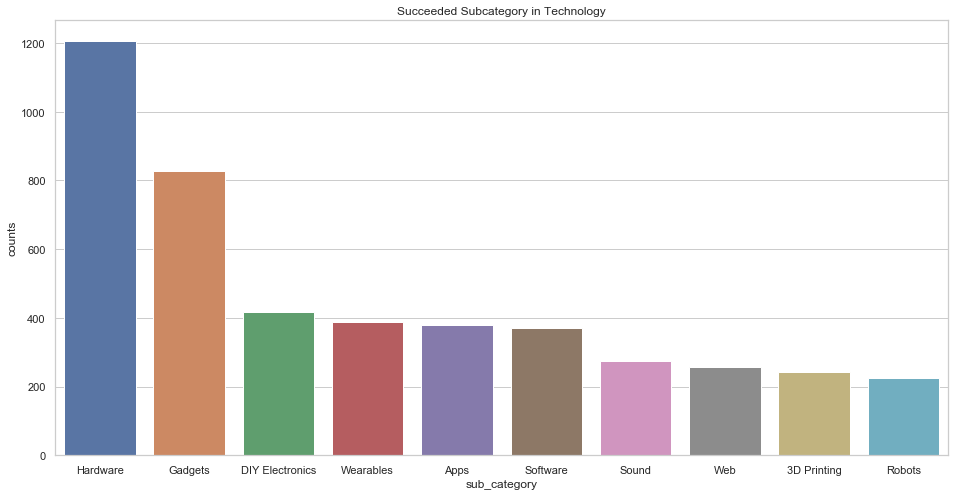

In [390]:
plt.figure(figsize=(16, 8))
sns.barplot(x='sub_category', y='counts', data=succeeded_techs[succeeded_techs['sub_category'] != 'Technology'].head(10))
plt.title("Succeeded Subcategory in Technology");

What sub categories were failed in Technology?

Especially, the below sub categories were failed:

* Apps
* Software

In [381]:
df[(df['main_category'] == 'Technology') & (df['state'] == 'failed')].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year
2015-06-03 05:52:43,1000245024,Safer Home,Hardware,Technology,CAD,2015-07-03,50000.0,2015-06-03 05:52:43,0.0,failed,0,CA,0.00,0.00,39739.31,2015
2017-06-02 12:20:21,1000256230,Shreddit - Privacy on Reddit,Software,Technology,GBP,2017-07-02,2000.0,2017-06-02 12:20:21,0.0,failed,0,GB,0.00,0.00,2579.35,2017
2016-07-24 13:18:36,1000261018,Diposta - liberating people from their postal ...,Web,Technology,USD,2016-08-23,100000.0,2016-07-24 13:18:36,141.0,failed,3,US,100.00,141.00,100000.00,2016
2015-02-05 16:57:21,100039820,Best Spray Bottle Ever - SureShot,Gadgets,Technology,CAD,2015-03-07,25000.0,2015-02-05 16:57:21,3.0,failed,3,CA,2.41,2.36,19632.48,2015
2017-05-10 16:00:18,1000468345,iRNinja - Control your TV with a simple press ...,Gadgets,Technology,USD,2017-06-14,500.0,2017-05-10 16:00:18,74.0,failed,6,US,261.00,74.00,500.00,2017


In [448]:
failed_techs =  df[(df['main_category'] == 'Technology') & (df['state'] == 'failed')]['category'].value_counts().to_frame()
failed_techs['counts'] = failed_techs['category']
failed_techs['sub_category'] = failed_techs.index.values
failed_techs = failed_techs.reset_index(drop=True)
failed_techs = failed_techs.drop('category', axis=1)
failed_techs

,counts,sub_category
0,4909,Apps
1,4409,Technology
2,2979,Web
3,2202,Software
4,1909,Hardware
5,1496,Gadgets
6,579,Wearables
7,380,DIY Electronics
8,326,3D Printing
9,278,Flight


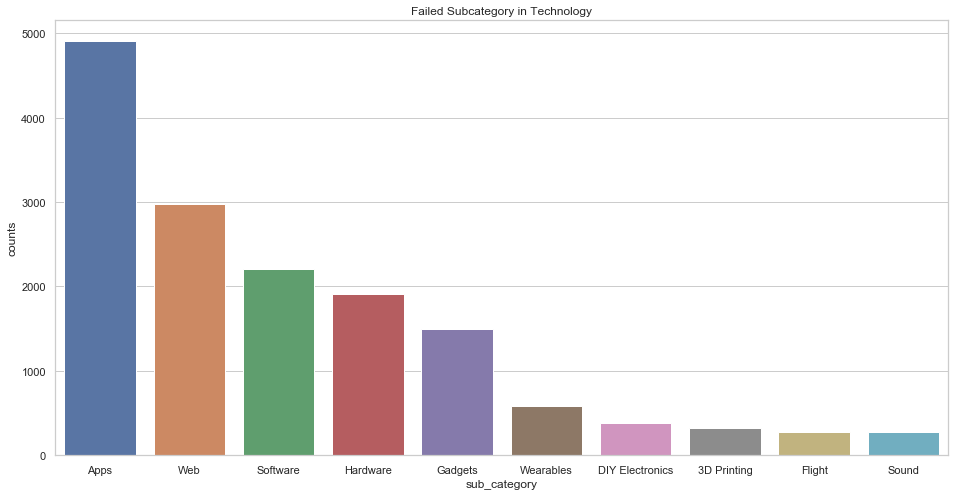

In [392]:
plt.figure(figsize=(16, 8))
sns.barplot(x='sub_category', y='counts', data=failed_techs[failed_techs['sub_category'] != 'Technology'].head(10))
plt.title("Failed Subcategory in Technology");

Considering these facts, successful projects provide something tangible such as hardware and gadgets. On the other hand, most of the applications and software projects were failed.

It is likely to be the projects provide something tangible can be funded easily. A simple solution is hardware or gadgets for your technology project.

# Summary

Based on the analysis in this post, I’ve had the below three findings:

1. The number of projects has been decreasing after 2015, but the total amount of pledge has been increasing.
1. A category of the projects is one of the keys factors associated with the success/failure of the projects. Dance, Theatre and Comics are the top three successful categories.
1. Hardware and gadgets for your technology project to increase the success ratio.